<a href="https://colab.research.google.com/github/yslikitha/OpenIIT/blob/main/Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your data from a CSV file
file_path = 'search_indices.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Exclude the first column from normalization
columns_to_normalize = df.columns[1:-1]  # Exclude the first column and the last column (Total_Tourists)

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize all columns except the last one ("Total_Tourists")
df.loc[:, columns_to_normalize] = scaler.fit_transform(df.loc[:, columns_to_normalize])

# You can normalize the last column ("Total_Tourists") separately, if needed
df['Total_Tourists'] = scaler.fit_transform(df[['Total_Tourists']])

# Define the lag periods you want to calculate correlations for
lag_periods = [0, 1, 2, 3]

# Create an empty DataFrame to store correlations
correlation_df = pd.DataFrame(columns=['Lag_Period'] + list(columns_to_normalize))

# Calculate correlations for each feature and lag period, excluding "Total_Tourists"
for lag in lag_periods:
    correlations = []
    for feature in columns_to_normalize:
        # Create a new column name for the lagged feature
        lagged_feature = f'{feature}_lag_{lag}'

        # Create a lagged column in the DataFrame
        df[lagged_feature] = df[feature].shift(lag)

        # Fill missing values with the mean of the original column
        df[lagged_feature].fillna(df[feature].mean(), inplace=True)

        # Calculate the Pearson correlation coefficient
        correlation = df[['Total_Tourists', lagged_feature]].corr().iloc[0, 1]

        # Append the correlation value to the list
        correlations.append(correlation)

    # Add correlations for this lag period to the DataFrame
    correlation_df.loc[len(correlation_df)] = [lag] + correlations

# Print the DataFrame showing correlations
print(correlation_df)


   Lag_Period  Shimla tourism: (India)  Best time to visit Shimla: (India)  \
0         0.0                 0.283402                            0.451696   
1         1.0                 0.262611                            0.379032   
2         2.0                 0.205144                            0.298746   
3         3.0                 0.149558                            0.270461   

   shimla weather forecast: (India)  Things to do in Shimla: (India)  \
0                          0.131467                         0.213856   
1                          0.032217                         0.181387   
2                          0.106571                         0.131989   
3                          0.304785                        -0.028534   

   Shimla hotels and resorts: (India)  Shimla Mall Road: (India)  \
0                            0.309140                   0.452294   
1                            0.143529                   0.193647   
2                            0.080675       

In [ ]:
# Define the threshold for correlation
threshold = 0.6

# Create an empty DataFrame to store results
selected_correlations = pd.DataFrame(columns=['Keyword', 'Lag_Period', 'Correlation'])

# Loop through each keyword and calculate the maximum correlation lag period
for feature in columns_to_normalize:
    max_corr = 0
    max_lag = 0

    for lag in lag_periods:
        lagged_feature = f'{feature}_lag_{lag}'
        correlation = df[['Total_Tourists', lagged_feature]].corr().iloc[0, 1]

        if abs(correlation) > max_corr:
            max_corr = abs(correlation)
            max_lag = lag

    if max_corr > threshold:
        selected_correlations.loc[len(selected_correlations)] = [feature, max_lag, max_corr]

# Print the DataFrame with keyword correlations exceeding the threshold
print(selected_correlations)


                            Keyword  Lag_Period  Correlation
0           Shimla by road: (India)           0     0.616974
1       Places near shimla: (India)           0     0.612613
2            Bus to shimla: (India)           0     0.686547
3           trip to shimla: (India)           0     0.607456
4              Shimla tour: (India)           1     0.603467
5     chandigarh to shimla: (India)           0     0.627382
6     Shimla tour packages: (India)           1     0.601212
7   Shimla Railway Station: (India)           0     0.670484
8          Delhi to shimla: (India)           0     0.682885
9           Train to kalka: (India)           0     0.742863
10         Kullu to shimla: (India)           0     0.669006
11        Manali to shimla: (India)           0     0.676326
12        Ambala to shimla: (India)           0     0.610129
13         Kalka to shimla: (India)           0     0.726182
14               Mall road: (India)           0     0.628314


In [ ]:
import pandas as pd

# Assuming 'selected_correlations' is your DataFrame with selected keywords and their lag periods

# Create an empty DataFrame to store the composite index
composite_index = pd.DataFrame()

# Loop through the selected keywords
for index, row in selected_correlations.iterrows():
    keyword = row['Keyword']
    lag_period = int(row['Lag_Period'])
    correlation = row['Correlation']

    # Create a new column for the keyword with its weighted value
    composite_index[keyword] = df[f'{keyword}_lag_{lag_period}'] * correlation

# Copy the 'Month' column from the original DataFrame to the composite_index DataFrame
composite_index['Month'] = df['Month']

# Add the 'Total_Tourists' column to the composite_index DataFrame
composite_index['Total_Tourists'] = df['Total_Tourists']

# Add the 'Composite_Index' column
composite_index['Composite_Index'] = composite_index.sum(axis=1)

# Rearrange the columns to place 'Month' as the first column and 'Total_Tourists' as the last column
column_order = ['Month'] + list(selected_correlations['Keyword']) + ['Composite_Index', 'Total_Tourists']
composite_index = composite_index[column_order]

# The modified 'composite_index' DataFrame has 'Month' as the first column and 'Total_Tourists' as the last column
print(composite_index)


       Month  Shimla by road: (India)  Places near shimla: (India)  \
0    2010-01                 0.096783                     0.049428   
1    2010-02                 0.425654                    -0.739588   
2    2010-03                 1.950421                     1.555732   
3    2010-04                 0.485449                     2.165427   
4    2010-05                 1.651447                     1.376411   
..       ...                      ...                          ...   
151  2022-08                -0.680549                    -0.309215   
152  2022-09                -0.680549                    -0.201622   
153  2022-10                -0.650651                    -0.273351   
154  2022-11                -0.650651                    -0.165758   
155  2022-12                -0.531062                     0.300479   

     Bus to shimla: (India)  trip to shimla: (India)  Shimla tour: (India)  \
0                 -0.794539                -1.507205          5.497296e-17   
1  

<ipython-input-61-a48ccac906d6>:24: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  composite_index['Composite_Index'] = composite_index.sum(axis=1)


In [ ]:
composite_index['Composite_Index'] = scaler.fit_transform(composite_index[['Composite_Index']])

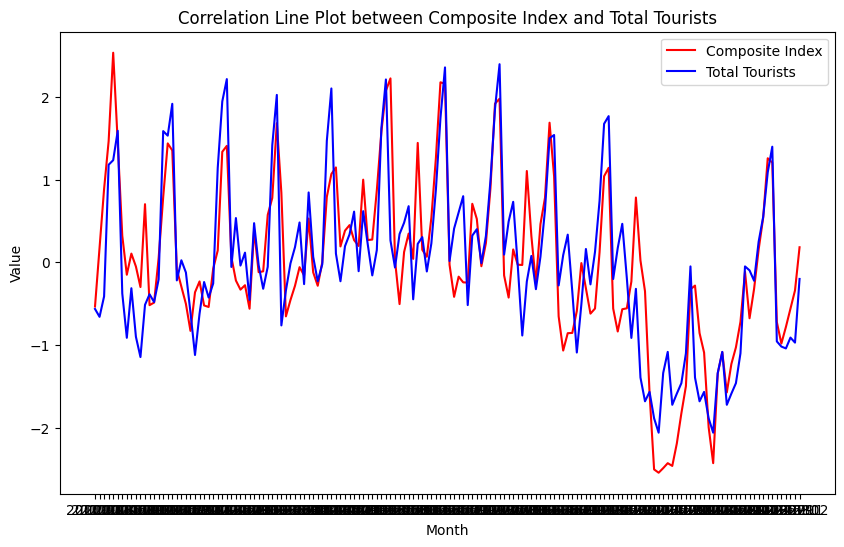

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'composite_index' is your DataFrame with 'Composite_Index' and 'Total_Tourists' columns

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(composite_index['Month'], composite_index['Composite_Index'], label='Composite Index', color='red')
plt.plot(composite_index['Month'], composite_index['Total_Tourists'], label='Total Tourists', color='blue')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Correlation Line Plot between Composite Index and Total Tourists')
plt.legend()

# Display the plot
plt.show()


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Assuming you have your DataFrame 'composite_index' containing 'Composite_Index' and 'Total_Tourists' columns

# Perform Granger causality test
max_lag = 1 # Set your desired maximum lag order
test_result = grangercausalitytests(composite_index[['Total_Tourists', 'Composite_Index']], max_lag, verbose=True)

# Analyze the Granger causality test results
for lag in range(1, max_lag + 1):
    chi2 = test_result[lag][0]['params_ftest'][0]
    p_value = test_result[lag][0]['params_ftest'][1]
    if p_value < 0.05:  # Set your desired significance level
        print(f"Lag {lag}: Granger-causes (p-value: {p_value:.4f})")
    else:
        print(f"Lag {lag}: Not Granger-causes (p-value: {p_value:.4f})")



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6973  , p=0.0318  , df_denom=152, df_num=1
ssr based chi2 test:   chi2=4.7900  , p=0.0286  , df=1
likelihood ratio test: chi2=4.7175  , p=0.0299  , df=1
parameter F test:         F=4.6973  , p=0.0318  , df_denom=152, df_num=1
Lag 1: Granger-causes (p-value: 0.0318)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have your DataFrame 'composite_index' containing 'Month', 'Composite_Index', and 'Total_Tourists' columns

# Create a new DataFrame with only the desired columns
data = composite_index[['Month', 'Composite_Index', 'Total_Tourists']]

# Split the data into training and testing sets
train_ratio = 0.8  # Set your desired training data ratio
test_ratio = 1 - train_ratio

# Use train_test_split to split the data
train_data, test_data = train_test_split(data, test_size=test_ratio, random_state=42)

# You now have 'train_data' and 'test_data' DataFrames for training and testing, respectively.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. 

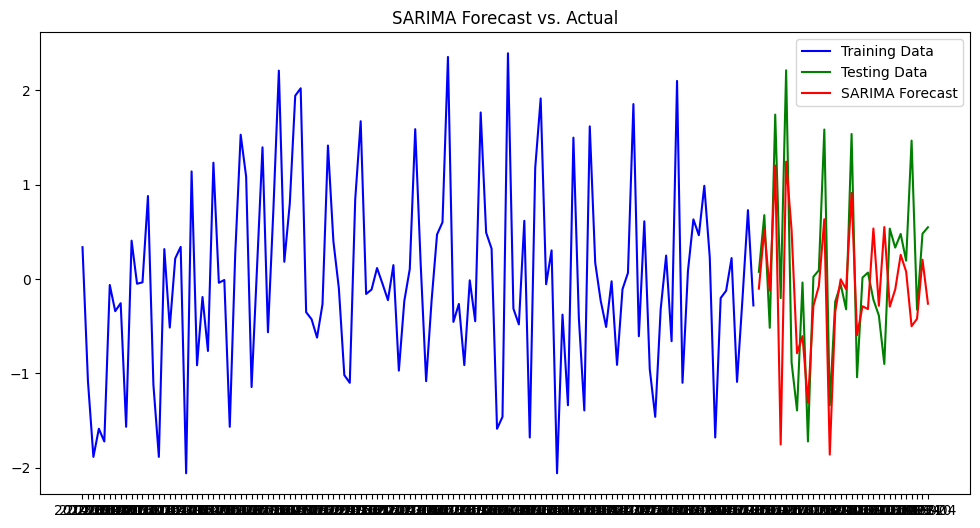

Mean Squared Error (MSE): 0.5348055146787317
Mean Absolute Error (MAE): 0.5602191041248535
Root Mean Squared Error (RMSE): 0.73
Mean Absolute Percentage Error (MAPE): 69.58%


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming you have 'train_data' and 'test_data' DataFrames
# Ensure 'Month' is in datetime format

# Fit a SARIMA model
order = (1, 1, 2)  # (p, d, q) - You can tune these parameters
seasonal_order = (2, 1, 0, 12)  # (P, D, Q, S) - You can tune these parameters

# Fit the SARIMA model
model = SARIMAX(train_data['Total_Tourists'], exog=train_data['Composite_Index'], order=order, seasonal_order=seasonal_order, enforce_invertibility=False)
results = model.fit()

# Make predictions on the test data
forecast = results.get_forecast(steps=len(test_data), exog=test_data['Composite_Index'])

# Extract the forecasted values
forecast_mean = forecast.predicted_mean

# Calculate the accuracy of the forecasts using MAPE (Mean Absolute Percentage Error)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(test_data['Total_Tourists'], forecast_mean)

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['Month'], train_data['Total_Tourists'], label='Training Data', color='blue')
plt.plot(test_data['Month'], test_data['Total_Tourists'], label='Testing Data', color='green')
plt.plot(test_data['Month'], forecast_mean, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('SARIMA Forecast vs. Actual')
plt.show()

# Evaluate the model (e.g., using mean squared error, mean absolute error, etc.)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_data['Total_Tourists'], forecast_mean)
mae = mean_absolute_error(test_data['Total_Tourists'], forecast_mean)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


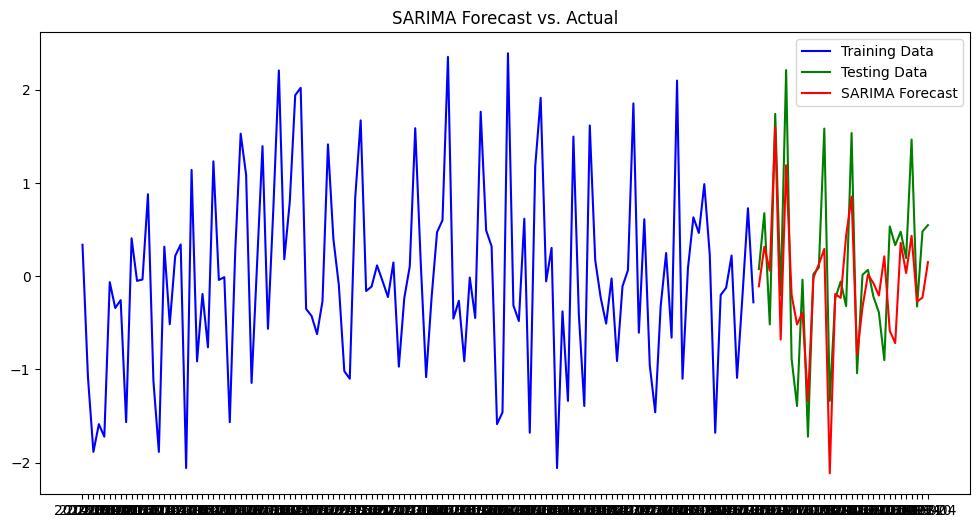

Mean Squared Error (MSE): 0.3825526846765708
Mean Absolute Error (MAE): 0.48622142664162427
Root Mean Squared Error (RMSE): 0.62


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming you have 'train_data' and 'test_data' DataFrames
# Ensure 'Month' is in datetime format

# Fit a SARIMA model
order = (1, 1, 1)  # (p, d, q) - You can tune these parameters
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S) - You can tune these parameters

# Fit the SARIMA model
model = SARIMAX(train_data['Total_Tourists'], exog=train_data['Composite_Index'], order=order, seasonal_order=seasonal_order, enforce_invertibility=False)
results = model.fit()

# Make predictions on the test data
forecast = results.get_forecast(steps=len(test_data), exog=test_data['Composite_Index'])

# Extract the forecasted values
forecast_mean = forecast.predicted_mean

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['Month'], train_data['Total_Tourists'], label='Training Data', color='blue')
plt.plot(test_data['Month'], test_data['Total_Tourists'], label='Testing Data', color='green')
plt.plot(test_data['Month'], forecast_mean, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('SARIMA Forecast vs. Actual')
plt.show()

# Evaluate the model (e.g., using mean squared error, mean absolute error, etc.)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_data['Total_Tourists'], forecast_mean)
mae = mean_absolute_error(test_data['Total_Tourists'], forecast_mean)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 0.57
Mean Squared Error (MSE): 0.48
Root Mean Squared Error (RMSE): 0.70


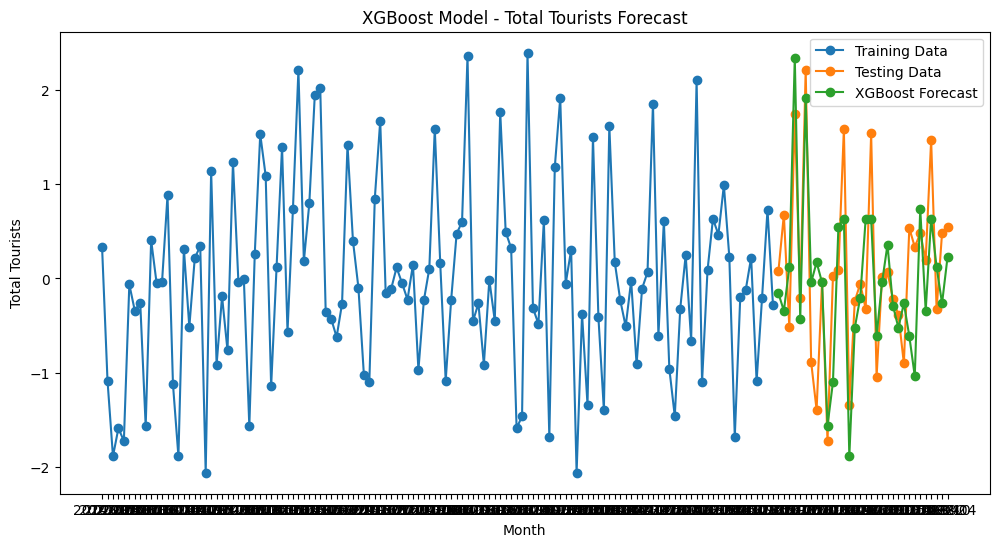

In [ ]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have your DataFrame 'data' containing 'Month', 'Composite_Index', and 'Total_Tourists' columns
data = composite_index[['Month', 'Composite_Index', 'Total_Tourists']]

# Split the data into training and testing sets
train_ratio = 0.8  # Set your desired training data ratio
test_ratio = 1 - train_ratio

# Use train_test_split to split the data
train_data, test_data = train_test_split(data, test_size=test_ratio, random_state=42)

# Prepare data for XGBoost
X_train = train_data[['Composite_Index']]
y_train = train_data['Total_Tourists']
X_test = test_data[['Composite_Index']]
y_test = test_data['Total_Tourists']

# Create an XGBoost model
model = xgb.XGBRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)



# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the training, testing, and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(train_data['Month'], train_data['Total_Tourists'], label='Training Data', marker='o')
plt.plot(test_data['Month'], test_data['Total_Tourists'], label='Testing Data', marker='o')
plt.plot(test_data['Month'], y_pred, label='XGBoost Forecast', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Tourists')
plt.legend()
plt.title('XGBoost Model - Total Tourists Forecast')
plt.show()


In [ ]:
pip install tensorflow scikit-learn pandas numpy


Epoch 1/50
4/4 - 2s - loss: 0.2757 - 2s/epoch - 439ms/step
Epoch 2/50
4/4 - 0s - loss: 0.2231 - 37ms/epoch - 9ms/step
Epoch 3/50
4/4 - 0s - loss: 0.1748 - 30ms/epoch - 7ms/step
Epoch 4/50
4/4 - 0s - loss: 0.1317 - 30ms/epoch - 7ms/step
Epoch 5/50
4/4 - 0s - loss: 0.0943 - 29ms/epoch - 7ms/step
Epoch 6/50
4/4 - 0s - loss: 0.0621 - 37ms/epoch - 9ms/step
Epoch 7/50
4/4 - 0s - loss: 0.0447 - 28ms/epoch - 7ms/step
Epoch 8/50
4/4 - 0s - loss: 0.0466 - 31ms/epoch - 8ms/step
Epoch 9/50
4/4 - 0s - loss: 0.0502 - 34ms/epoch - 9ms/step
Epoch 10/50
4/4 - 0s - loss: 0.0456 - 33ms/epoch - 8ms/step
Epoch 11/50
4/4 - 0s - loss: 0.0419 - 29ms/epoch - 7ms/step
Epoch 12/50
4/4 - 0s - loss: 0.0421 - 30ms/epoch - 7ms/step
Epoch 13/50
4/4 - 0s - loss: 0.0428 - 29ms/epoch - 7ms/step
Epoch 14/50
4/4 - 0s - loss: 0.0420 - 42ms/epoch - 10ms/step
Epoch 15/50
4/4 - 0s - loss: 0.0408 - 37ms/epoch - 9ms/step
Epoch 16/50
4/4 - 0s - loss: 0.0408 - 29ms/epoch - 7ms/step
Epoch 17/50
4/4 - 0s - loss: 0.0409 - 28ms/epoch

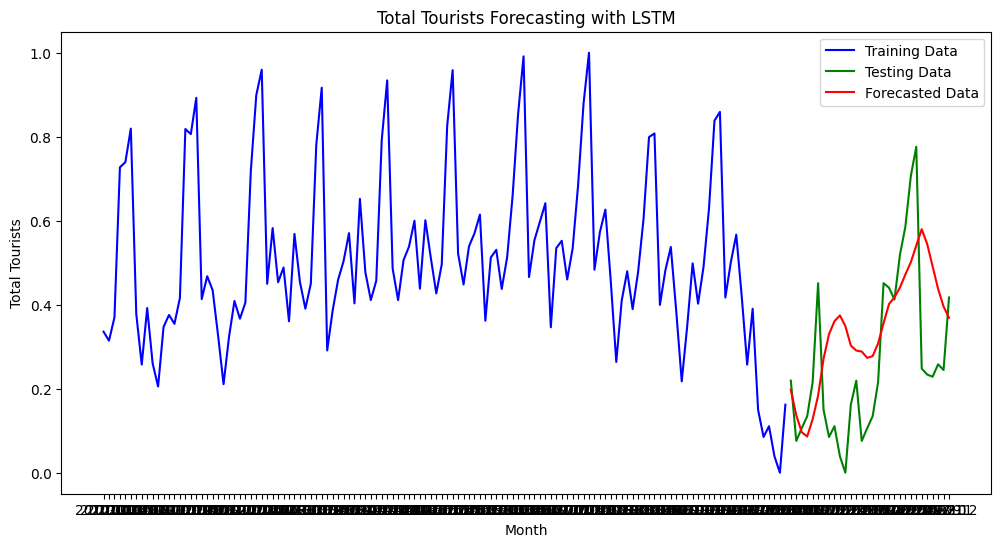

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Select features and target variable
data = data[['Month', 'Composite_Index', 'Total_Tourists']]

# Normalize the data
scaler = MinMaxScaler()
data[['Composite_Index', 'Total_Tourists']] = scaler.fit_transform(data[['Composite_Index', 'Total_Tourists']])

# Create a function to prepare sequences for training
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i + sequence_length][['Composite_Index']].values
        target = data[i + sequence_length:i + sequence_length + 1]['Total_Tourists'].values
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

# Set sequence length and split data into training and testing
sequence_length = 10  # You can adjust this as needed
X, y = create_sequences(data, sequence_length)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model
y_pred = model.predict(X_test)

# Normalize the data for 'Composite_Index' and 'Total_Tourists' separately
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()
data['Composite_Index'] = scaler1.fit_transform(data[['Composite_Index']])
data['Total_Tourists'] = scaler2.fit_transform(data[['Total_Tourists']])

# ...

# Reshape and inverse transform the arrays separately
y_pred = scaler2.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler2.inverse_transform(y_test.reshape(-1, 1))


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

def mean_absolute_percentage_error(y_true, y_pred):
    nonzero_indices = y_true != 0
    y_true_nonzero = y_true[nonzero_indices]
    y_pred_nonzero = y_pred[nonzero_indices]
    return np.mean(np.abs((y_true_nonzero - y_pred_nonzero) / y_true_nonzero)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Create a plot for training, testing, and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(data['Month'][:-len(X_test)], data['Total_Tourists'][:-len(X_test)], label='Training Data', color='b')
plt.plot(data['Month'][-len(X_test):], y_test, label='Testing Data', color='g')
plt.plot(data['Month'][-len(X_test):], y_pred, label='Forecasted Data', color='r')
plt.legend(loc='best')
plt.xlabel('Month')
plt.ylabel('Total Tourists')
plt.title('Total Tourists Forecasting with LSTM')
plt.show()
